<a href="https://colab.research.google.com/github/Gkcoli/MLThings/blob/main/Exercise3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 3

Create a model using K-Nearest Neigbors to perform classification using the personality dataset.

0 -'introvert'

1 - 'extrovert'

## A. Import libraries

In [94]:
import sklearn
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## B. Load and understand the dataset

In [95]:
# put your answer here
df = pd.read_excel("./personality.xlsx")
df.head()


,Name,Post Frequently,Active,Replies to comments,No of Followers,Personality
0,Giana Nelle,1,0,51,247,0
1,Jessy Cassandra,0,0,51,242,0
2,Franze Carlo,0,1,51,218,0
3,Blix,1,0,60,184,0
4,Christian Joshua,0,1,53,183,0


1. Display the summary of all the features of the dataset using `.info()`

In [96]:
# put your answer here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Name                 43 non-null     object
 1   Post Frequently      43 non-null     int64 
 2   Active               43 non-null     int64 
 3   Replies to comments  43 non-null     int64 
 4   No of Followers      43 non-null     int64 
 5   Personality          43 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 2.1+ KB


2. Display the total number of samples from each label using `.value_counts()`

In [97]:
# put your answer here
df['Personality'].value_counts()

,count
Personality,
0,24
1,19


## C. Split the dataset into training and test set

3. Convert the features into an numpy array using `.values()` and store it in a variable "X"

In [98]:
# put your answer here
X = df.drop(['Name','Personality'], axis=1).values

4. Convert the labels into an numpy array using `.values()` and store it in a variable "y"

In [99]:
# put your answer here
y = df['Personality'].values

5. Use `train_test_split()` to split the data.

- Declare a variable `X_train` that will hold the training data
- Declare a variable `X_test` that will hold the test data
- Declare a variable `y_train` that will hold the label of the training data
- Declare a variable `y_test` that will hold the label of the test data


In [100]:
# put your answer here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

## D. Create the model

6. Use KNN as a classifier by using `KNeighborsClassifier()`

In [101]:
# put your answer here
knn = KNeighborsClassifier(n_neighbors=15)

7. Train the model using the `.fit()`

In [102]:
# put your answer here
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=15)

8. Test the model using the `.predict()`

In [103]:
# put your answer here
new_data = [[0, 1, 0, 1000, 0]]  # Add a 0 for the missing feature


## Evaluate the model

9. Create a confusion matrix

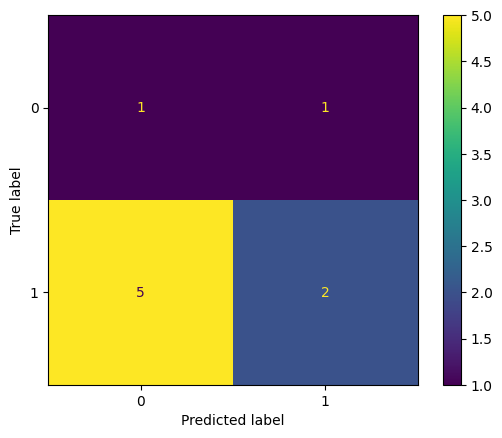

In [104]:
# put your answer here
y_pred = knn.predict(X_test)
conf_matrix = confusion_matrix(y_pred, y_test, labels=knn.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                              display_labels=knn.classes_)
disp.plot()


10. Display the accuracy

In [105]:
# put your answer here
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.3333333333333333

11. Display the precision

In [106]:
# put your answer here
precision = precision_score(y_test, y_pred, average=None)
print("Precision:", precision)

Precision: [0.5        0.28571429]


12. Display the recall

In [107]:
# put your answer here
recall = recall_score(y_test, y_pred, average=None)
print("Recall:", recall)

Recall: [0.16666667 0.66666667]


13. Display the f1-score

In [108]:
# put your answer here
f1 = f1_score(y_test, y_pred, average=None)
print("f1-score:", f1)

f1-score: [0.25 0.4 ]


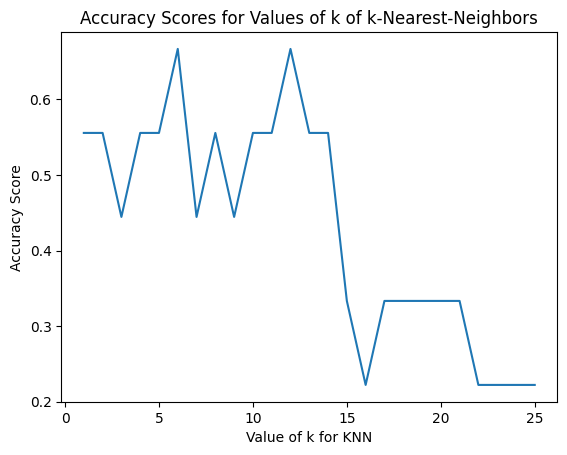

In [109]:
k_range = list(range(1,26))
scores = []

for k in k_range:

    knn = KNeighborsClassifier(n_neighbors=k)

    # Train the model
    knn.fit(X_train, y_train)

    # Test the model
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()